In [20]:
from __future__ import print_function, division
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [21]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [22]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False)


classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

foreground_classes = {'horse','ship', 'truck'}

background_classes = {'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog'}

# print(type(foreground_classes))

In [23]:
dataiter = iter(trainloader)
background_data=[]
background_label=[]
foreground_data=[]
foreground_label=[]
batch_size=10
for i in range(5000):
    images, labels = dataiter.next()
    for j in range(batch_size):
        if(classes[labels[j]] in background_classes):
            img = images[j].tolist()
            background_data.append(img)
            background_label.append(labels[j])
        else:
            img = images[j].tolist()
            foreground_data.append(img)
            foreground_label.append(labels[j])
            
foreground_data = torch.tensor(foreground_data)
foreground_label = torch.tensor(foreground_label)
background_data = torch.tensor(background_data)
background_label = torch.tensor(background_label)
    

In [24]:
print(foreground_data.size())
print(background_data.size())
torch.save(foreground_data,'foreground_data.pt')
torch.save(background_data,'background_data.pt')
torch.save(foreground_label,'foreground_label.pt')
torch.save(background_label,'background_label.pt')
# torch.load()

torch.Size([15000, 3, 32, 32])
torch.Size([35000, 3, 32, 32])


In [25]:
torch.load('foreground_data.pt')
# print(foreground_data.size())
# print(background_data.size())

tensor([[[[-0.3882, -0.3725, -0.3176,  ..., -0.1216, -0.1216, -0.0824],
          [-0.1529, -0.3020, -0.1529,  ..., -0.2627, -0.2784, -0.2784],
          [ 0.1686, -0.0667, -0.2314,  ..., -0.3333, -0.4118, -0.4039],
          ...,
          [-0.2627, -0.2471, -0.2471,  ..., -0.3804, -0.2706, -0.1922],
          [-0.3490, -0.2941, -0.2078,  ..., -0.3647, -0.2549, -0.2078],
          [-0.3098, -0.3255, -0.3255,  ..., -0.4196, -0.2471, -0.2078]],

         [[-0.5373, -0.4039, -0.3020,  ...,  0.1608,  0.1765,  0.2157],
          [-0.3882, -0.4275, -0.2078,  ...,  0.0275,  0.0510,  0.0667],
          [-0.1294, -0.2863, -0.3804,  ..., -0.0353, -0.0667, -0.0431],
          ...,
          [-0.0118, -0.0039,  0.0039,  ..., -0.1059, -0.0039,  0.0745],
          [-0.0980, -0.0431,  0.0431,  ..., -0.0902,  0.0039,  0.0510],
          [-0.0588, -0.0745, -0.0745,  ..., -0.1373,  0.0118,  0.0431]],

         [[-0.4118, -0.3020, -0.1843,  ...,  0.2471,  0.2627,  0.3020],
          [-0.2784, -0.3412, -

In [26]:
import torch
foreground_data = torch.load('foreground_data.pt')
background_data = torch.load('background_data.pt')
foreground_label = torch.load('foreground_label.pt')
background_label = torch.load('background_label.pt')


In [27]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

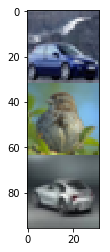

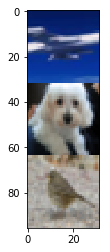

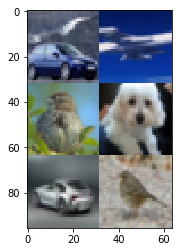

torch.Size([3, 96, 32])


In [28]:
img1 = torch.cat((background_data[0],background_data[1],background_data[2]),1)
imshow(img1)
img2 = torch.cat((background_data[27],background_data[3],background_data[43]),1)
imshow(img2)
img3 = torch.cat((img1,img2),2)
imshow(img3)
print(img2.size())

In [29]:
print(np.random.randint(1,15000,8))

[ 2651 13686  5796  6490 12255  3966 11806  7128]


In [44]:
def create_mosaic_img(bg_idx,fg_idx,fg):
    image_dict ={}
    j=0
    for i in range(9):
        if i != fg:
            image_dict['img'+str(i)] = background_data[bg_idx[j]]
            j+=1
        else: 
            image_dict['img'+str(i)] = foreground_data[fg_idx]
            label = foreground_label[fg_idx]
#     print(image_dict)
#     row1 = torch.cat((image_dict['img0'],image_dict['img1'],image_dict['img2']),2)
#     row2 = torch.cat((image_dict['img3'],image_dict['img4'],image_dict['img5']),2)
#     row3 = torch.cat((image_dict['img6'],image_dict['img7'],image_dict['img8']),2)
#     mosaic = torch.cat((row1,row2,row3),1)
#     return mosaic
    return image_dict,label

In [58]:
# print(bg_idx, fg_idx,fg)
# bg_idx = [0,1,2,27,3,43,99,155]
# fg_idx = 1
# fg = 5
# collage = create_mosaic_img(bg_idx,fg_idx,fg)
desired_num = 1000
mosaic_list_of_dict =[]        #lis of dict, each dict have img0-img9
fore_idx =[]                   #list of indexes at which foreground image is present in a mosaic image                
mosaic_label=[]                # label of mosaic image = foreground class present in that mosaic
for i in range(desired_num):
    bg_idx = np.random.randint(0,35000,8)
    fg_idx = np.random.randint(0,15000)
    fg = np.random.randint(0,9)
    fore_idx.append(fg)
    dict_1,label = create_mosaic_img(bg_idx,fg_idx,fg)
    mosaic_list_of_dict.append(dict_1)
    mosaic_label.append(label)
# imshow(mosaic_list_of_dict[0]['img4'])


1000
truck
8


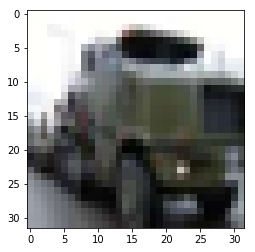

<class 'torch.Tensor'>


In [79]:
print(len(mosaic_list_of_dict))
print(classes[mosaic_label[13]])
print(fore_idx[13])
imshow(mosaic_list_of_dict[13]['img8'])
print(type(mosaic_list_of_dict[1]['img0']))

In [130]:
# def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
# #     print(img)
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()


# # get some random training images
# dataiter = iter(trainloader)
# images, labels = dataiter.next()
# print(len(images))

# # show images
# imshow(torchvision.utils.make_grid(images))
# print(labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(10)))
k=2
print('im'+str(k))
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net.parameters)

im2
<bound method Module.parameters of Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>


In [127]:
import torch.nn as nn
import torch.nn.functional as F


class Module1(nn.Module):
    def __init__(self):
        super(Module1, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.fc4 = nn.Linear(10,1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


net = Module1()
print(net.parameters)



<bound method Module.parameters of Module1(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=1, bias=True)
)>


In [121]:
class Module2(nn.Module):
    def __init__(self):
        super(Module2, self).__init__()
        self.module1 = Module1()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.fc4 = nn.Linear(10,3)

    def forward(self,z):  #x be a dict of 9 images
        y = torch.zeros([32,32], dtype=torch.float64)
        for i in range(9):
            y = y + z['img'+str(i)]*self.module1.forward(z['img'+str(i)])
        imshow(y)
        y = self.pool(F.relu(self.conv1(y)))
        y = self.pool(F.relu(self.conv2(y)))
        y = x.view(-1, 16 * 5 * 5)
        y = F.relu(self.fc1(y))
        y = F.relu(self.fc2(y))
        y = F.relu(self.fc3(y))
        y = self.fc4(y)
        return y
    
fore_net = Module2()
print(fore_net.parameters)

<bound method Module.parameters of Module2(
  (module1): Module1(
    (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (fc1): Linear(in_features=400, out_features=120, bias=True)
    (fc2): Linear(in_features=120, out_features=84, bias=True)
    (fc3): Linear(in_features=84, out_features=10, bias=True)
    (fc4): Linear(in_features=10, out_features=1, bias=True)
  )
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=3, bias=True)
)>


In [122]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [123]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for data in (mosaic_list_of_dict):
        # get the inputs; data is a list of [inputs, labels]
        inputs = data
#         print(len(data))
        labels = mosaic_label
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = fore_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

RuntimeError: Expected 4-dimensional input for 4-dimensional weight 6 3 5, but got 3-dimensional input of size [3, 32, 32] instead

In [124]:
for data in (mosaic_list_of_dict):
    print(data['img'+str(0)].size())


torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 3

In [131]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.304
[1,  4000] loss: 2.305
[2,  2000] loss: 2.305
[2,  4000] loss: 2.304
Finished Training


In [36]:
[1,  2000] loss: 2.216
[1,  4000] loss: 1.902
[2,  2000] loss: 1.569
[2,  4000] loss: 1.468
Finished Training


SyntaxError: invalid syntax (<ipython-input-36-2feb82e00b28>, line 1)